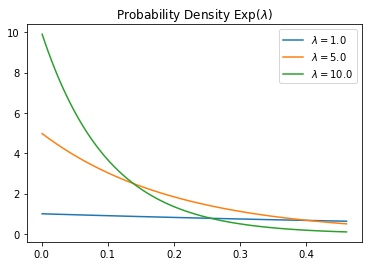

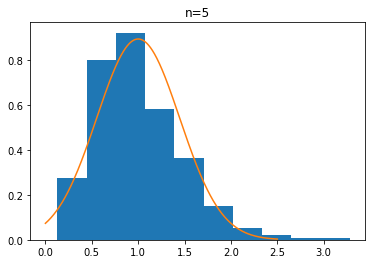

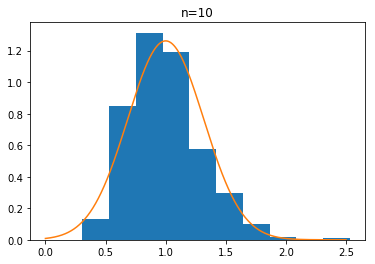

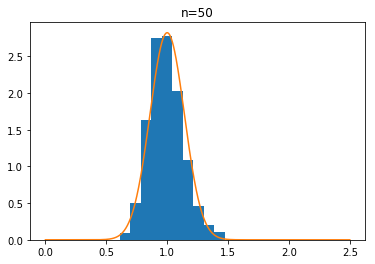

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Рассмотрим экспоненциальное распрделение
my_lambda = [1.0, 5.0, 10.0]
my_scale = [1/l for l in my_lambda]
my_loc = [0, 0, 0]

i = 0
exp_rand = []
for i in range(len(my_lambda)):
    exp_rand.append(sts.expon(my_loc[i], my_scale[i]))
    
# График плотности экспоненциального распределения
x = np.linspace(exp_rand[2].ppf(0.01),exp_rand[2].ppf(0.99), 100)
fig = plt.figure()
i = 0
for exp_r in exp_rand:
    plt.plot(x, exp_r.pdf(x),label="$\lambda=%s$" % my_lambda[i])
    i += 1
plt.legend()
plt.title("Probability Density Exp($\lambda$)")
    
# Формирование выборки и подсчет срдневыборочного значения    
exp_dist = exp_rand[0]
count_sample = 1000
n = [5, 10, 50]

data_average = np.empty([len(n), count_sample])
for i in range(len(n)):
    data = exp_dist.rvs((count_sample, n[i]))
    data_average[i] = np.average(data, axis=1)

# Паратеметры теоретические
EX_exp = exp_dist.moment(1)
DX_exp = exp_dist.var()

# Параметры для нормальной апроксимации
EX_norm = EX_exp
DX_norm = DX_exp/n
sigma_norm = DX_norm ** (1/2.)

# Формирование распределения для нормальной апроксимации
norm_dist = []
for i in range(len(n)):
    norm_dist.append(sts.norm(EX_norm, sigma_norm[i]))
x = np.linspace(0,2.5,1000)

# Построение гистограммы и нормальной апроксимации для каждого n 
for i in range(len(n)):
    fig = plt.figure()
    plt.hist(data_average[i], normed=True)
    plt.plot(x, norm_dist[i].pdf(x))
    plt.title("n=%s" % n[i])
    
